In [ ]:
!pip install tensorflow
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 37.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import calendar

In [ ]:
df=pd.read_csv('panchang_data.csv')
df.head()

,Date,Day,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Calendar,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,01-01-2012,"Today's Panchangam - January 1, 2012 (Sunday)",City,Hyderabad,Sunrise & Sunset,6:46 am (Sunrise) & 5:52 pm (Sunset),Month & Paksham,Paush & Shukla Paksha,Panchangam,Tithi*,...,3:04 pm - 4:26 pm,Good Time(to start any important work),Amritakalam*,7:22 am - 9:08 am,Abhijit Muhurtham*,11:57 am - 12:41 pm,* indicates end timing. ** more than 24:00...,NaN,NaN,NaN
1,02-01-2012,"Today's Panchangam - January 2, 2012 (Monday)",City,Hyderabad,Sunrise & Sunset,6:46 am (Sunrise) & 5:53 pm (Sunset),Month & Paksham,Paush & Shukla Paksha,Panchangam,Tithi*,...,1:42 pm - 3:04 pm,Good Time(to start any important work),Amritakalam*,12:57 pm - 2:44 pm,Abhijit Muhurtham*,11:57 am - 12:41 pm,* indicates end timing. ** more than 24:00...,NaN,NaN,NaN
2,03-01-2012,"Today's Panchangam - January 3, 2012 (Tuesday)",City,Hyderabad,Sunrise & Sunset,6:46 am (Sunrise) & 5:53 pm (Sunset),Month & Paksham,Paush & Shukla Paksha,Panchangam,Tithi*,...,12:20 pm - 1:42 pm,Good Time(to start any important work),Amritakalam*,10:35 am - 12:23 pm,Abhijit Muhurtham*,11:58 am - 12:42 pm,* indicates end timing. ** more than 24:00...,NaN,NaN,NaN
3,04-01-2012,"Today's Panchangam - January 4, 2012 (Wednesday)",City,Hyderabad,Sunrise & Sunset,6:47 am (Sunrise) & 5:54 pm (Sunset),Month & Paksham,Paush & Shukla Paksha,Panchangam,Tithi*,...,10:58 am - 12:20 pm,Good Time(to start any important work),Amritakalam*,4:14 pm - 6:02 pm,Abhijit Muhurtham*,Nil,* indicates end timing. ** more than 24:00...,NaN,NaN,NaN
4,05-01-2012,"Today's Panchangam - January 5, 2012 (Thursday)",City,Hyderabad,Sunrise & Sunset,6:47 am (Sunrise) & 5:55 pm (Sunset),Month & Paksham,Paush & Shukla Paksha,Panchangam,Tithi*,...,9:36 am - 10:58 am,Good Time(to start any important work),Amritakalam*,9:34 pm - 11:20 pm,Abhijit Muhurtham*,11:59 am - 12:43 pm,* indicates end timing. ** more than 24:00...,NaN,NaN,NaN


In [ ]:
df = pd.concat([df['Date'],df['Day'],df['Tithi'],df['Nakshatram'],df['Yogam'],df['Karanam']],axis=1)
df.head()

,Date,Day,Tithi,Nakshatram,Yogam,Karanam
0,01-01-2012,"Today's Panchangam - January 1, 2012 (Sunday)",Ashtami 24:58,Uttara Bhadrapada 12:41,Varigha 07:19,Vishti 11:44 Bava 24:58
1,02-01-2012,"Today's Panchangam - January 2, 2012 (Monday)",Navami 27:35,Revati 15:38,Parigha 08:05,Balava 14:15 Kaulava 27:35
2,03-01-2012,"Today's Panchangam - January 3, 2012 (Tuesday)",Dashami 30:12,Ashwini 18:42,Shiva 09:00,Taitila 16:54 Garaja 30:12
3,04-01-2012,"Today's Panchangam - January 4, 2012 (Wednesday)",Ekadashi Full Night,Bharani 21:38,Siddha 09:52,Vanija 19:26 Vishti Full Night
4,05-01-2012,"Today's Panchangam - January 5, 2012 (Thursday)",Ekadashi 08:35,Krittika 24:13,Sadhya 10:32,Vishti 08:35 Bava 21:38


In [ ]:
pattern = r'\(([^)]+)\)'
df['day'] = df['Day'].str.extract(pattern)
df.head()

,Date,Day,Tithi,Nakshatram,Yogam,Karanam,day
0,01-01-2012,"Today's Panchangam - January 1, 2012 (Sunday)",Ashtami 24:58,Uttara Bhadrapada 12:41,Varigha 07:19,Vishti 11:44 Bava 24:58,Sunday
1,02-01-2012,"Today's Panchangam - January 2, 2012 (Monday)",Navami 27:35,Revati 15:38,Parigha 08:05,Balava 14:15 Kaulava 27:35,Monday
2,03-01-2012,"Today's Panchangam - January 3, 2012 (Tuesday)",Dashami 30:12,Ashwini 18:42,Shiva 09:00,Taitila 16:54 Garaja 30:12,Tuesday
3,04-01-2012,"Today's Panchangam - January 4, 2012 (Wednesday)",Ekadashi Full Night,Bharani 21:38,Siddha 09:52,Vanija 19:26 Vishti Full Night,Wednesday
4,05-01-2012,"Today's Panchangam - January 5, 2012 (Thursday)",Ekadashi 08:35,Krittika 24:13,Sadhya 10:32,Vishti 08:35 Bava 21:38,Thursday


In [ ]:
df = df.iloc[:3530,:]
df.tail()

,Date,Day,Tithi,Nakshatram,Yogam,Karanam,day
3525,27-12-2021,"Today's Panchangam - December 27, 2021 (Monday)",Ashtami 19:28,Hasta 29:07,Saubhagya 08:53,Balava 07:52 Kaulava 19:28,Monday
3526,28-12-2021,"Today's Panchangam - December 28, 2021 (Tuesday)",Navami 18:09,Chitra 28:11,Shobhana 06:52 Atiganda 28:19,Taitila 06:53 Garaja 18:09,Tuesday
3527,29-12-2021,"Today's Panchangam - December 29, 2021 (Wednes...",Dashami 16:11,Swati 26:38,Sukarman 25:18,Vishti 16:11 Bava 27:00,Wednesday
3528,30-12-2021,"Today's Panchangam - December 30, 2021 (Thursday)",Ekadashi 13:40,Vishakha 24:34,Dhriti 21:50,Balava 13:40 Kaulava 24:12,Thursday
3529,31-12-2021,"Today's Panchangam - December 31, 2021 (Friday)",Dwadashi 10:39,Anuradha 22:04,Shula 18:00,Taitila 10:39 Garaja 21:00,Friday


In [ ]:
temp = pd.read_csv('Bangalore_1990_2022_BangaloreCity.csv')

In [ ]:
temp[temp['time']=='01-01-2012']

,time,tavg,tmin,tmax,prcp
8035,01-01-2012,22.1,16.7,28.5,0.0


In [ ]:
temp = temp.iloc[8035:11688,1:4]
temp.head()

,tavg,tmin,tmax
8035,22.1,16.7,28.5
8036,22.3,18.3,29.2
8037,23.1,18.0,30.6
8038,23.7,18.8,30.6
8039,23.3,18.6,30.1


In [ ]:
temp.reset_index(drop=True, inplace=True)

In [ ]:
data = pd.concat([df,temp],axis=1)
data.head()

,Date,Day,Tithi,Nakshatram,Yogam,Karanam,day,tavg,tmin,tmax
0,01-01-2012,"Today's Panchangam - January 1, 2012 (Sunday)",Ashtami 24:58,Uttara Bhadrapada 12:41,Varigha 07:19,Vishti 11:44 Bava 24:58,Sunday,22.1,16.7,28.5
1,02-01-2012,"Today's Panchangam - January 2, 2012 (Monday)",Navami 27:35,Revati 15:38,Parigha 08:05,Balava 14:15 Kaulava 27:35,Monday,22.3,18.3,29.2
2,03-01-2012,"Today's Panchangam - January 3, 2012 (Tuesday)",Dashami 30:12,Ashwini 18:42,Shiva 09:00,Taitila 16:54 Garaja 30:12,Tuesday,23.1,18.0,30.6
3,04-01-2012,"Today's Panchangam - January 4, 2012 (Wednesday)",Ekadashi Full Night,Bharani 21:38,Siddha 09:52,Vanija 19:26 Vishti Full Night,Wednesday,23.7,18.8,30.6
4,05-01-2012,"Today's Panchangam - January 5, 2012 (Thursday)",Ekadashi 08:35,Krittika 24:13,Sadhya 10:32,Vishti 08:35 Bava 21:38,Thursday,23.3,18.6,30.1


In [ ]:
data['Tithi'] = data['Tithi'].str.replace(r' \d+:\d+', '', regex=True)

In [ ]:
data['Tithi'] = data['Tithi'].str.replace(' Full Night', '')

In [ ]:
data.head()

,Date,Day,Tithi,Nakshatram,Yogam,Karanam,day,tavg,tmin,tmax
0,01-01-2012,"Today's Panchangam - January 1, 2012 (Sunday)",Ashtami,Uttara Bhadrapada,Varigha,Vishti Bava,Sunday,22.1,16.7,28.5
1,02-01-2012,"Today's Panchangam - January 2, 2012 (Monday)",Navami,Revati,Parigha,Balava Kaulava,Monday,22.3,18.3,29.2
2,03-01-2012,"Today's Panchangam - January 3, 2012 (Tuesday)",Dashami,Ashwini,Shiva,Taitila Garaja,Tuesday,23.1,18.0,30.6
3,04-01-2012,"Today's Panchangam - January 4, 2012 (Wednesday)",Ekadashi,Bharani,Siddha,Vanija Vishti,Wednesday,23.7,18.8,30.6
4,05-01-2012,"Today's Panchangam - January 5, 2012 (Thursday)",Ekadashi,Krittika,Sadhya,Vishti Bava,Thursday,23.3,18.6,30.1


In [ ]:
data['panchang'] = data[['Tithi', 'Nakshatram', 'Yogam','Karanam','day']].apply(' '.join, axis=1)
data.head()

,Date,Day,Tithi,Nakshatram,Yogam,Karanam,day,tavg,tmin,tmax,panchang
0,01-01-2012,"Today's Panchangam - January 1, 2012 (Sunday)",Ashtami,Uttara Bhadrapada,Varigha,Vishti Bava,Sunday,22.1,16.7,28.5,Ashtami Uttara Bhadrapada Varigha Vishti B...
1,02-01-2012,"Today's Panchangam - January 2, 2012 (Monday)",Navami,Revati,Parigha,Balava Kaulava,Monday,22.3,18.3,29.2,Navami Revati Parigha Balava Kaulava Monday
2,03-01-2012,"Today's Panchangam - January 3, 2012 (Tuesday)",Dashami,Ashwini,Shiva,Taitila Garaja,Tuesday,23.1,18.0,30.6,Dashami Ashwini Shiva Taitila Garaja Tuesday
3,04-01-2012,"Today's Panchangam - January 4, 2012 (Wednesday)",Ekadashi,Bharani,Siddha,Vanija Vishti,Wednesday,23.7,18.8,30.6,Ekadashi Bharani Siddha Vanija Vishti Wed...
4,05-01-2012,"Today's Panchangam - January 5, 2012 (Thursday)",Ekadashi,Krittika,Sadhya,Vishti Bava,Thursday,23.3,18.6,30.1,Ekadashi Krittika Sadhya Vishti Bava Thur...


In [ ]:
data.tail()

,Date,Day,Tithi,Nakshatram,Yogam,Karanam,day,tavg,tmin,tmax,panchang,panchang_embeddings
3525,27-12-2021,"Today's Panchangam - December 27, 2021 (Monday)",Ashtami,Hasta,Saubhagya,Balava Kaulava,Monday,24.1,21.0,29.6,Ashtami Hasta Saubhagya Balava Kaulava Mo...,"((tf.Tensor(0.18235925, shape=(), dtype=float3..."
3526,28-12-2021,"Today's Panchangam - December 28, 2021 (Tuesday)",Navami,Chitra,Shobhana Atiganda,Taitila Garaja,Tuesday,22.7,20.5,30.4,Navami Chitra Shobhana Atiganda Taitila G...,"((tf.Tensor(0.13378689, shape=(), dtype=float3..."
3527,29-12-2021,"Today's Panchangam - December 29, 2021 (Wednes...",Dashami,Swati,Sukarman,Vishti Bava,Wednesday,22.4,20.1,28.4,Dashami Swati Sukarman Vishti Bava Wednesday,"((tf.Tensor(0.16588545, shape=(), dtype=float3..."
3528,30-12-2021,"Today's Panchangam - December 30, 2021 (Thursday)",Ekadashi,Vishakha,Dhriti,Balava Kaulava,Thursday,21.7,19.2,25.8,Ekadashi Vishakha Dhriti Balava Kaulava T...,"((tf.Tensor(0.19082296, shape=(), dtype=float3..."
3529,31-12-2021,"Today's Panchangam - December 31, 2021 (Friday)",Dwadashi,Anuradha,Shula,Taitila Garaja,Friday,22.4,19.7,26.2,Dwadashi Anuradha Shula Taitila Garaja Fr...,"((tf.Tensor(0.27886683, shape=(), dtype=float3..."


In [ ]:
d =pd.concat([data['Date'],data['tavg']],axis=1)
d.head()

,Date,tavg
0,01-01-2012,22.1
1,02-01-2012,22.3
2,03-01-2012,23.1
3,04-01-2012,23.7
4,05-01-2012,23.3


In [ ]:
d[d['Date']=='12-04-2021']

,Date,tavg
3274,12-04-2021,22.1


In [ ]:
d2 = d.iloc[2498:3211,:]
d2.head()

,Date,tavg
2562,06-04-2019,20.6
2563,07-04-2019,20.7
2564,08-04-2019,21.3
2565,09-04-2019,21.3
2566,10-04-2019,21.1


In [ ]:
d2 = d2.reset_index()['tavg']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
d2 = scaler.fit_transform(np.array(d2).reshape(-1,1))

In [ ]:
d2.shape

(713, 1)

In [ ]:
training_size = int(len(d2)*0.75)
test_size = len(d2)-training_size
train_data,test_data = d2[0:training_size,:],d2[training_size:len(d2),:1]

In [ ]:
timestep = 30
X_train,y_train = create_dataset(train_data,timestep)
X_test,y_test = create_dataset(test_data,timestep)

In [ ]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
model1 = Sequential()
model1.add(LSTM(64,return_sequences=True,input_shape=(30,1)))
model1.add(LSTM(60,return_sequences=True))
model1.add(LSTM(50))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model1.fit(X_train,y_train,validation_data =(X_test,y_test),epochs=30,batch_size=64,verbose=1)

Epoch 1/30
8/8 [==============================] - 8s 227ms/step - loss: 0.1441 - val_loss: 0.0748
Epoch 2/30
8/8 [==============================] - 1s 73ms/step - loss: 0.0306 - val_loss: 0.0120
Epoch 3/30
8/8 [==============================] - 1s 70ms/step - loss: 0.0218 - val_loss: 0.0269
Epoch 4/30
8/8 [==============================] - 1s 69ms/step - loss: 0.0171 - val_loss: 0.0166
Epoch 5/30
8/8 [==============================] - 1s 73ms/step - loss: 0.0149 - val_loss: 0.0171
Epoch 6/30
8/8 [==============================] - 1s 67ms/step - loss: 0.0134 - val_loss: 0.0164
Epoch 7/30
8/8 [==============================] - 1s 66ms/step - loss: 0.0126 - val_loss: 0.0134
Epoch 8/30
8/8 [==============================] - 1s 65ms/step - loss: 0.0125 - val_loss: 0.0140
Epoch 9/30
8/8 [==============================] - 1s 69ms/step - loss: 0.0120 - val_loss: 0.0129
Epoch 10/30
8/8 [==============================] - 0s 60ms/step - loss: 0.0119 - val_loss: 0.0135
Epoch 11/30
8/8 [===========

In [ ]:
train_predict = model1.predict(X_train)
test_predict=model1.predict(X_test)

5/5 [==============================] - 0s 12ms/step


In [ ]:
train_predict1 = scaler.inverse_transform(train_predict)
test_predict1 = scaler.inverse_transform(test_predict)

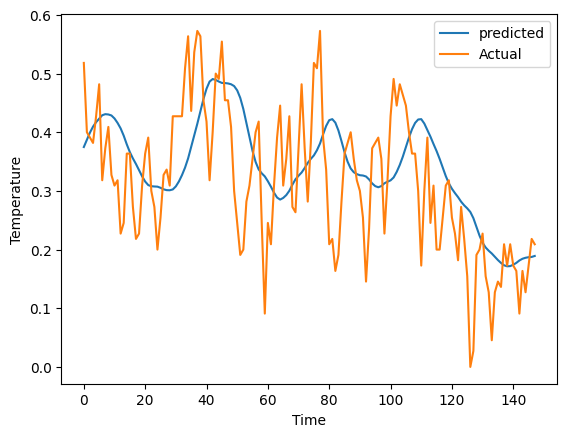

In [ ]:
plt.plot(test_predict)
plt.plot(y_test)
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend(['predicted','Actual'])

In [ ]:
df2 = pd.concat([data['Date'],data['tavg']],axis=1)
df2.head()

,Date,tavg
0,01-01-2012,22.1
1,02-01-2012,22.3
2,03-01-2012,23.1
3,04-01-2012,23.7
4,05-01-2012,23.3


In [ ]:
df2[df2['Date']=='01-01-2019']

,Date,tavg
2471,01-01-2019,24.3


In [ ]:
df3 = df2.iloc[2407:3113,:]
df3.head()

,Date,tavg
2471,01-01-2019,24.3
2472,02-01-2019,24.1
2473,03-01-2019,24.3
2474,04-01-2019,24.0
2475,05-01-2019,25.0


In [ ]:
df3 = df3.reset_index()['tavg']

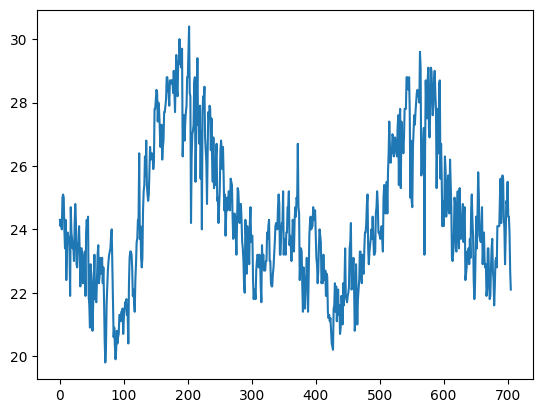

In [ ]:
plt.plot(df3)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df3 = scaler.fit_transform(np.array(df3).reshape(-1,1))

In [ ]:
df3.shape

(706, 1)

In [ ]:
training_size = int(len(df3)*0.75)
test_size = len(df3)-training_size
train_data,test_data = df3[0:training_size,:],df3[training_size:len(df3),:1]

In [ ]:
def create_dataset(data,step=1):
  X,y=[],[]
  for i in range(len(data)-step-1):
    a=data[i:(i+step),0]
    X.append(a)
    y.append(data[i+step,0])
  return np.array(X),np.array(y)

In [ ]:
timestep = 14
X_train,y_train = create_dataset(train_data,timestep)
X_test,y_test = create_dataset(test_data,timestep)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(514, 14)
(514,)


In [ ]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(64,return_sequences=True,input_shape=(14,1)))
model.add(LSTM(60,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 14, 64)            16896     
                                                                 
 lstm_12 (LSTM)              (None, 14, 60)            30000     
                                                                 
 lstm_13 (LSTM)              (None, 50)                22200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 69147 (270.11 KB)
Trainable params: 69147 (270.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data =(X_test,y_test),epochs=30,batch_size=64,verbose=1)

Epoch 1/30
9/9 [==============================] - 6s 156ms/step - loss: 0.0874 - val_loss: 0.0586
Epoch 2/30
9/9 [==============================] - 0s 31ms/step - loss: 0.0219 - val_loss: 0.0285
Epoch 3/30
9/9 [==============================] - 0s 36ms/step - loss: 0.0160 - val_loss: 0.0221
Epoch 4/30
9/9 [==============================] - 0s 32ms/step - loss: 0.0141 - val_loss: 0.0177
Epoch 5/30
9/9 [==============================] - 0s 44ms/step - loss: 0.0123 - val_loss: 0.0168
Epoch 6/30
9/9 [==============================] - 0s 55ms/step - loss: 0.0113 - val_loss: 0.0151
Epoch 7/30
9/9 [==============================] - 0s 48ms/step - loss: 0.0109 - val_loss: 0.0159
Epoch 8/30
9/9 [==============================] - 0s 48ms/step - loss: 0.0108 - val_loss: 0.0151
Epoch 9/30
9/9 [==============================] - 0s 48ms/step - loss: 0.0109 - val_loss: 0.0151
Epoch 10/30
9/9 [==============================] - 0s 48ms/step - loss: 0.0110 - val_loss: 0.0178
Epoch 11/30
9/9 [===========

In [ ]:
train_predict = model.predict(X_train)
test_predict=model.predict(X_test)

6/6 [==============================] - 0s 7ms/step


In [ ]:
train_predict1 = scaler.inverse_transform(train_predict)
test_predict1 = scaler.inverse_transform(test_predict)

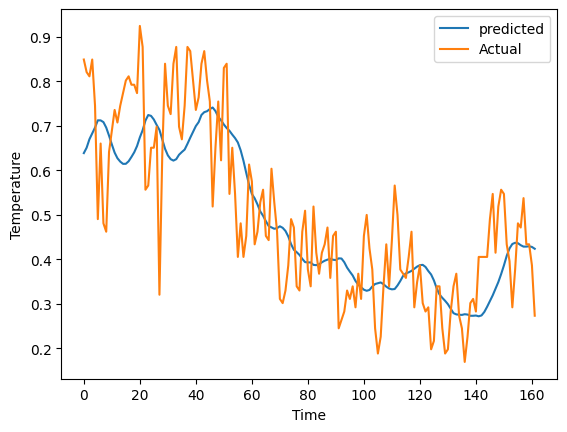

In [ ]:
plt.plot(test_predict)
plt.plot(y_test)
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend(['predicted','Actual'])

In [ ]:
data=data.dropna()

In [ ]:
data['Nakshatram'] = data['Nakshatram'].str.replace(r' \d+:\d+', '', regex=True)
data['Nakshatram'] = data['Nakshatram'].str.replace(' Full Night', '')
data['Yogam'] = data['Yogam'].str.replace(r' \d+:\d+', '', regex=True)
data['Yogam'] = data['Yogam'].str.replace(' Full Night', '')
data['Karanam'] = data['Karanam'].str.replace(r' \d+:\d+', '', regex=True)
data['Karanam'] = data['Karanam'].str.replace(' Full Night', '')

In [ ]:
new_df2 = pd.concat([data['day'],data['tavg']],axis=1)

In [ ]:
new_df = pd.DataFrame(columns=['Tithi', 'tavg'])

for index, row in data.iterrows():
    tithi_values = row['Tithi'].split()
    tavg = row['tavg']

    for tithi in tithi_values:
        new_df = new_df.append({'Tithi': tithi, 'tavg': tavg}, ignore_index=True)

Streaming output truncated to the last 5000 lines.
<ipython-input-15-82f58621f1fe>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({'Tithi': tithi, 'tavg': tavg}, ignore_index=True)
<ipython-input-15-82f58621f1fe>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({'Tithi': tithi, 'tavg': tavg}, ignore_index=True)
<ipython-input-15-82f58621f1fe>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({'Tithi': tithi, 'tavg': tavg}, ignore_index=True)
<ipython-input-15-82f58621f1fe>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({'Tithi': tithi, 'tavg':

In [ ]:
len(new_df)

3619

In [ ]:
new_df.head()

,Tithi,tavg
0,Ashtami,22.1
1,Navami,22.3
2,Dashami,23.1
3,Ekadashi,23.7
4,Ekadashi,23.3


In [ ]:
new_df1 = new_df.pivot_table(index=new_df.groupby('Tithi').cumcount(), columns='Tithi', values='tavg')
new_df1.reset_index(drop=True, inplace=True)
new_df1.head()

Tithi,Amavasya,Ashtami,Chaturdashi,Chaturthi,Dashami,Dwadashi,Dwitiya,Ekadashi,Navami,Panchami,Pratipada,Purnima,Saptami,Shashthi,Trayodashi,Tritiya
0,25.0,22.1,22.6,21.4,23.1,22.7,23.1,23.7,22.3,20.4,23.2,22.9,19.3,20.4,22.1,22.4
1,25.4,19.8,21.1,20.9,21.3,21.9,20.7,23.3,21.2,21.4,20.6,23.1,21.8,21.7,22.0,19.8
2,24.1,21.1,22.7,24.3,20.8,21.1,24.4,21.9,21.4,23.2,23.5,26.5,23.4,23.8,21.9,24.4
3,27.0,23.9,24.1,24.8,24.3,24.8,25.6,21.1,24.3,24.4,27.1,27.1,24.2,24.3,23.6,24.5
4,22.9,26.1,26.9,25.7,27.0,26.7,26.4,24.9,26.7,26.7,28.0,26.6,26.1,25.9,27.1,24.2


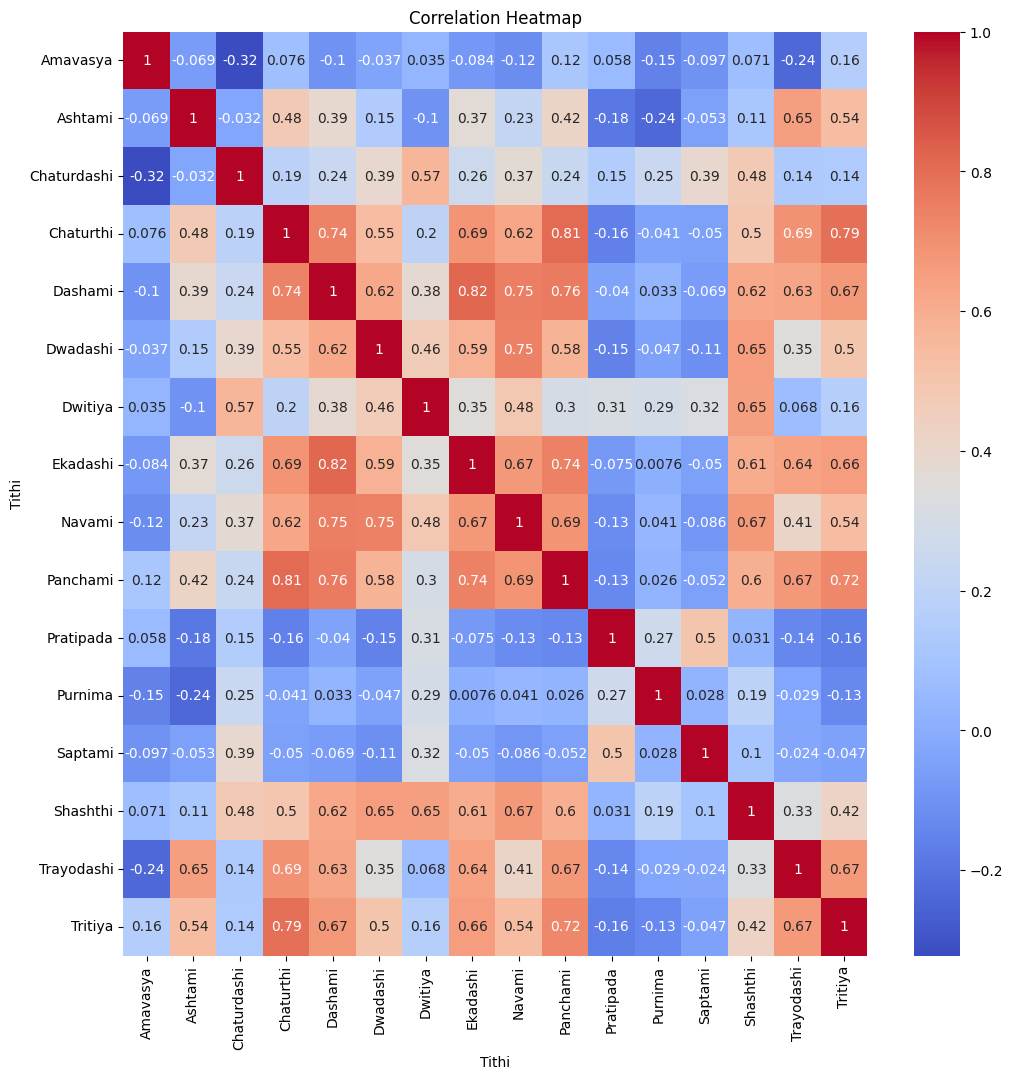

In [ ]:
correlation_matrix=new_df1.corr()
plt.figure(figsize=(12,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=new_df1.columns, yticklabels=new_df1.columns)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
new_df2 = new_df2.pivot_table(index=new_df2.groupby('day').cumcount(), columns='day', values='tavg')
new_df2.reset_index(drop=True, inplace=True)
new_df2.head()

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,22.7,22.3,22.1,22.1,23.3,23.1,23.7
1,21.4,22.9,20.4,22.6,22.4,23.2,23.1
2,21.9,19.8,22.0,19.3,21.9,21.2,21.3
3,20.9,21.8,21.4,21.1,19.8,20.6,20.7
4,21.1,22.7,21.1,21.7,20.8,21.1,21.4


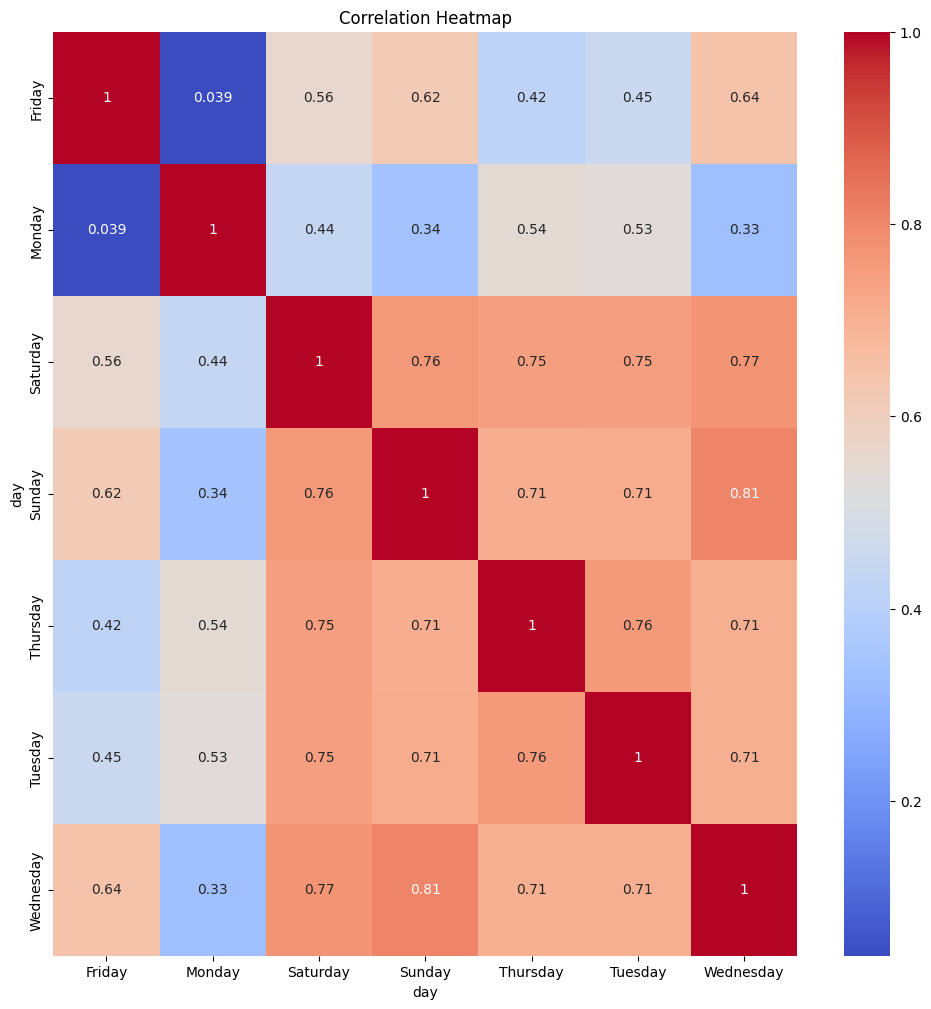

In [ ]:
Ok correlation_matrix=new_df2.corr()
plt.figure(figsize=(12,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=new_df2.columns, yticklabels=new_df2.columns)
plt.title('Correlation Heatmap')
plt.show()

<Axes: >

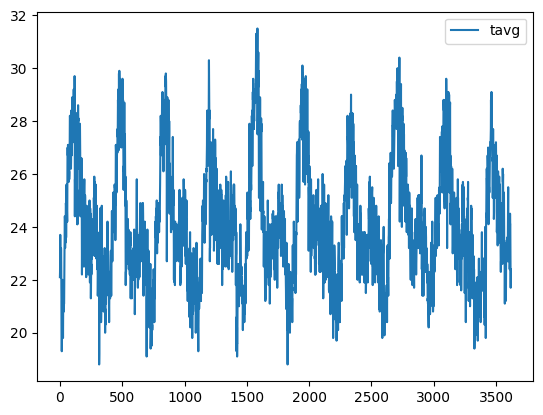

In [ ]:
new_df.plot()

In [ ]:
data[data['Date']=='10-03-2020']

,Date,Tithi,Nakshatram,Yogam,Karanam,day,tavg,tmin,tmax
2890,10-03-2020,Pratipada 19:22,Uttara Phalguni 22:01,Shula 12:35,Balava 09:19 Kaulava 19:22,Tuesday,21.4,18.7,27.0


In [ ]:
data = data.iloc[2890:3250,:]
data.head(30)

,Date,Tithi,Nakshatram,Yogam,Karanam,day,tavg,tmin,tmax
2890,10-03-2020,Pratipada 19:22,Uttara Phalguni 22:01,Shula 12:35,Balava 09:19 Kaulava 19:22,Tuesday,21.4,18.7,27.0
2891,11-03-2020,Dwitiya 15:32,Hasta 18:59,Ganda 08:12 Vriddhi 27:59,Garaja 15:32 Vanija 25:43,Wednesday,21.2,19.4,24.6
2892,12-03-2020,Tritiya 11:58,Chitra 16:15,Dhruva 24:04,Vishti 11:58 Bava 22:20,Thursday,21.3,19.2,25.0
2893,13-03-2020,Chaturthi 08:50 Panchami 30:16,Swati 13:59,Vyaghata 20:35,Balava 08:50 Kaulava 19:28,Friday,21.1,19.4,24.5
2894,14-03-2020,Shashthi 28:24,Vishakha 12:20,Harshana 17:38,Garaja 17:15 Vanija 28:24,Saturday,21.2,18.8,26.0
2895,15-03-2020,Saptami 27:18,Anuradha 11:23,Vajra 15:16,Vishti 15:45 Bava 27:18,Sunday,20.8,18.0,26.0
2896,16-03-2020,Ashtami 26:59,Jyeshtha 11:12,Siddhi 13:32,Balava 15:03 Kaulava 26:59,Monday,20.4,17.6,25.4
2897,17-03-2020,Navami 27:23,Mula 11:46,Vyatipata 12:24,Taitila 15:06 Garaja 27:23,Tuesday,20.3,15.8,24.5
2898,18-03-2020,Dashami 28:25,Purva Ashadha 13:01,Varigha 11:48,Vanija 15:50 Vishti 28:25,Wednesday,20.2,17.8,24.9
2899,19-03-2020,Ekadashi 29:58,Uttara Ashadha 14:49,Parigha 11:39,Bava 17:08 Balava 29:58,Thursday,21.5,17.0,26.8


In [ ]:
data['Tithi'] = data['Tithi'].str.replace(r' \d+:\d+', '', regex=True)

In [ ]:
data['Tithi'] = data['Tithi'].str.replace(' Full Night', '')

In [ ]:
data.reset_index(drop=True, inplace=True)
data.head()

,Date,Day,Tithi,Nakshatram,Yogam,Karanam,day,tavg,tmin,tmax
0,01-01-2012,"Today's Panchangam - January 1, 2012 (Sunday)",Ashtami,Uttara Bhadrapada 12:41,Varigha 07:19,Vishti 11:44 Bava 24:58,Sunday,22.1,16.7,28.5
1,02-01-2012,"Today's Panchangam - January 2, 2012 (Monday)",Navami,Revati 15:38,Parigha 08:05,Balava 14:15 Kaulava 27:35,Monday,22.3,18.3,29.2
2,03-01-2012,"Today's Panchangam - January 3, 2012 (Tuesday)",Dashami,Ashwini 18:42,Shiva 09:00,Taitila 16:54 Garaja 30:12,Tuesday,23.1,18.0,30.6
3,04-01-2012,"Today's Panchangam - January 4, 2012 (Wednesday)",Ekadashi,Bharani 21:38,Siddha 09:52,Vanija 19:26 Vishti Full Night,Wednesday,23.7,18.8,30.6
4,05-01-2012,"Today's Panchangam - January 5, 2012 (Thursday)",Ekadashi,Krittika 24:13,Sadhya 10:32,Vishti 08:35 Bava 21:38,Thursday,23.3,18.6,30.1


In [ ]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

In [ ]:
new = pd.DataFrame(index=data.index)

In [ ]:
new_df = pd.DataFrame(columns=['Tithi', 'tavg'])

for index, row in data.iterrows():
    tithi_values = row['Tithi'].split()
    tavg = row['tavg']

    for tithi in tithi_values:
        new_df = new_df.append({'Tithi': tithi, 'tavg': tavg}, ignore_index=True)

<ipython-input-36-82f58621f1fe>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({'Tithi': tithi, 'tavg': tavg}, ignore_index=True)
<ipython-input-36-82f58621f1fe>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({'Tithi': tithi, 'tavg': tavg}, ignore_index=True)
<ipython-input-36-82f58621f1fe>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({'Tithi': tithi, 'tavg': tavg}, ignore_index=True)
<ipython-input-36-82f58621f1fe>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({'Tithi': tithi, 'tavg': tavg}, ignore_index=True)
<ipython-input-36-82f586

In [ ]:
len(new_df)

374

In [ ]:
new_df=new_df.iloc[0:361,:]
new_df.head()

,Tithi,tavg
0,Ashtami,22.1
1,Navami,22.3
2,Dashami,23.1
3,Ekadashi,23.7
4,Ekadashi,23.3


In [ ]:
for i in range(12):
    new_df[f'm{i + 1}'] = new_df['tavg'].iloc[i * 30:(i + 1) * 30].reset_index(drop=True)

In [ ]:
new_df.head(30)

,Tithi,tavg,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,Ashtami,22.1,22.1,21.1,26.1,26.5,24.4,27.4,24.2,22.5,23.4,23.9,22.6,20.4
1,Navami,22.3,22.3,21.4,26.7,28.4,25.8,26.8,23.8,22.1,21.9,23.2,23.4,20.4
2,Dashami,23.1,23.1,20.8,27.0,27.6,25.5,26.2,25.4,23.2,23.9,25.1,23.8,20.8
3,Ekadashi,23.7,23.7,21.1,26.9,27.2,25.9,27.4,25.2,23.6,24.7,25.1,22.1,20.9
4,Ekadashi,23.3,23.3,21.1,26.7,26.7,26.6,27.4,24.7,24.1,24.3,24.8,21.4,22.1
5,Dwadashi,22.7,22.7,21.9,27.1,27.0,25.7,27.6,24.9,24.8,24.1,25.7,21.6,24.6
6,Trayodashi,22.1,22.1,22.7,26.9,27.0,26.1,26.2,24.9,23.3,24.5,25.9,22.4,24.8
7,Chaturdashi,22.6,22.6,23.1,26.5,27.1,26.6,27.5,25.2,23.2,24.3,25.3,22.6,23.3
8,Purnima,22.9,22.9,23.5,27.1,28.0,26.6,27.1,24.5,23.4,21.3,25.4,23.2,22.2
9,Pratipada,23.2,23.2,24.4,26.4,28.9,28.1,27.1,24.2,23.4,21.3,25.7,23.6,22.1


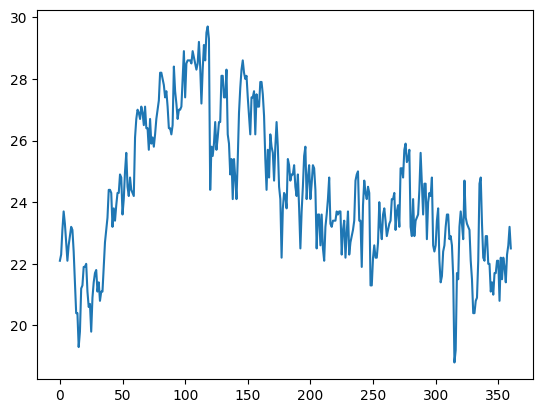

In [ ]:
plt.plot(new_df['tavg'])
plt.plot()

In [ ]:
corr = new_df.iloc[0:30,2:]
corr.head()

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,21.4,21.9,23.4,23.3,27.4,29.6,28.6,25.2,24.4,21.6,22.5,21.2
1,21.2,21.8,23.9,25.0,26.8,29.1,28.7,23.8,23.4,22.2,22.8,21.5
2,21.3,21.7,23.9,25.4,26.9,25.7,25.6,23.4,24.5,23.0,22.8,22.5
3,21.1,21.9,24.2,25.2,26.4,25.8,26.7,25.3,25.8,23.1,23.3,23.4
4,21.1,22.0,24.8,24.5,26.9,26.7,25.6,24.2,25.1,22.8,23.8,23.6


In [ ]:
correlation_matrix=corr.corr()

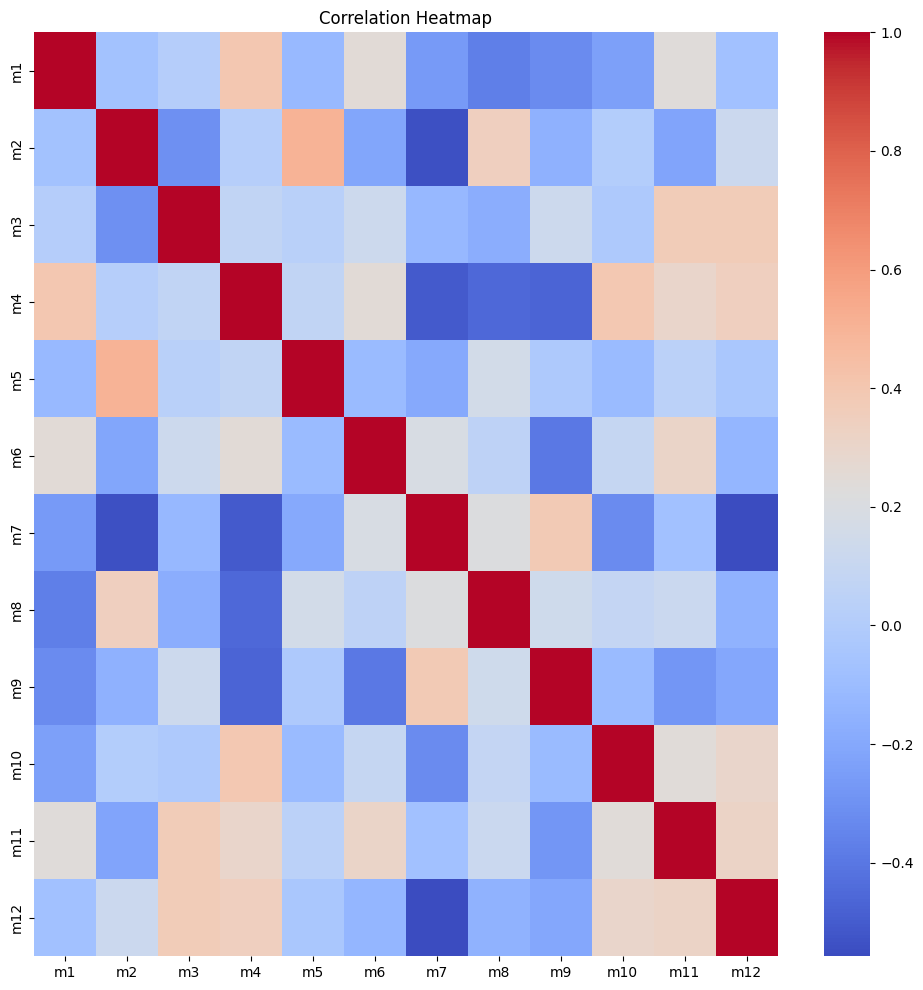

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', xticklabels=corr.columns, yticklabels=corr.columns)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
plt.savefig('panchang.png')

<Figure size 640x480 with 0 Axes>

In [ ]:
temp = pd.read_csv('Bangalore_1990_2022_BangaloreCity.csv')
temp.head()

,time,tavg,tmin,tmax,prcp
0,01-01-1990,22.9,19.1,28.4,NaN
1,02-01-1990,21.7,NaN,26.5,0.0
2,03-01-1990,21.0,16.4,26.5,0.0
3,04-01-1990,20.8,NaN,27.4,0.0
4,05-01-1990,20.4,14.2,26.1,0.0


In [ ]:
temp = temp.drop(['prcp'],axis=1)

In [ ]:
temp[temp['time']=='01-01-2020']

,time,tavg,tmin,tmax
10957,01-01-2020,22.0,19.2,27.2


In [ ]:
temp[temp['time']=='31-12-2020']

,time,tavg,tmin,tmax
11322,31-12-2020,21.1,18.8,29.6


In [ ]:
temp =temp.iloc[10957:11323,:]
temp.head()

,time,tavg,tmin,tmax
10957,01-01-2020,22.0,19.2,27.2
10958,02-01-2020,22.2,19.4,27.8
10959,03-01-2020,23.4,19.4,28.4
10960,04-01-2020,23.6,18.6,30.5
10961,05-01-2020,24.2,20.4,30.5


In [ ]:
temp.reset_index(drop=True, inplace=True)

In [ ]:
len(temp)

366

In [ ]:
temp['time'] = pd.to_datetime(temp['time'])

<ipython-input-152-5d06553652cd>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  temp['time'] = pd.to_datetime(temp['time'])


In [ ]:
temp.head()

,time,tavg,tmin,tmax
0,2020-01-01,22.0,19.2,27.2
1,2020-02-01,22.2,19.4,27.8
2,2020-03-01,23.4,19.4,28.4
3,2020-04-01,23.6,18.6,30.5
4,2020-05-01,24.2,20.4,30.5


In [ ]:
temp = temp.resample('D').mean()

new_df = pd.DataFrame()

for month in range(1, 13):
    start_date = pd.Timestamp(year=2020, month=month, day=1)
    end_date = pd.Timestamp(year=2020, month=month % 12 + 1, day=1)

    month_data = temp[(temp.index >= start_date) & (temp.index < end_date)]
    if len(month_data) < 30:
        month_data = month_data.resample('D').interpolate()

    new_df[month_data.index[0].strftime('%B')] = month_data['tavg'].values

<ipython-input-78-15b61174d598>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  month_data = month_data.append(pd.Series(name=pd.to_datetime('2020-01-01'), dtype='float'))
<ipython-input-78-15b61174d598>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  month_data = month_data.append(pd.Series(name=pd.to_datetime('2020-01-01'), dtype='float'))
<ipython-input-78-15b61174d598>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  month_data = month_data.append(pd.Series(name=pd.to_datetime('2020-01-01'), dtype='float'))
<ipython-input-78-15b61174d598>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  month_data = month_data.append(pd.Series(nam

In [ ]:
temp.set_index('time', inplace=True)

In [ ]:
new_df.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,22.0,23.4,25.5,28.8,28.7,25.9,24.7,23.0,24.0,23.5,24.8,21.1
1,22.2,22.9,24.5,28.8,27.7,24.4,22.4,22.8,22.9,24.7,24.3,20.8
2,23.4,23.3,25.8,28.5,27.5,24.7,22.6,22.9,23.8,23.5,24.7,19.9
3,23.6,23.5,26.4,28.4,28.7,25.4,22.8,21.9,24.9,22.5,24.5,20.8
4,24.2,23.7,27.4,28.8,29.1,25.7,23.3,22.1,24.8,23.6,24.3,21.0


In [ ]:
new_df.tail()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
26,23.9,25.2,26.4,26.7,24.1,24.4,24.1,24.2,23.3,23.7,19.7,21.4
27,23.9,24.5,26.9,27.2,24.9,24.8,24.7,25.3,24.1,23.3,21.5,21.2
28,24.2,25.2,27.8,23.2,24.1,23.6,22.9,25.7,22.4,21.9,21.6,22.5
29,24.8,NaN,27.8,26.5,24.6,24.6,23.5,25.6,22.3,22.9,21.9,22.8
30,25.1,NaN,27.8,NaN,26.3,NaN,23.9,24.4,NaN,24.1,NaN,21.1


In [ ]:
new_df = new_df.iloc[:30,:]
new_df.tail()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
25,23.4,25.4,26.9,26.7,25.6,24.2,23.6,25.6,22.8,23.6,19.4,21.2
26,23.9,25.2,26.4,26.7,24.1,24.4,24.1,24.2,23.3,23.7,19.7,21.4
27,23.9,24.5,26.9,27.2,24.9,24.8,24.7,25.3,24.1,23.3,21.5,21.2
28,24.2,25.2,27.8,23.2,24.1,23.6,22.9,25.7,22.4,21.9,21.6,22.5
29,24.8,NaN,27.8,26.5,24.6,24.6,23.5,25.6,22.3,22.9,21.9,22.8


In [ ]:
new_df.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,22.0,23.4,25.5,28.8,28.7,25.9,24.7,23.0,24.0,23.5,24.8,21.1
1,22.2,22.9,24.5,28.8,27.7,24.4,22.4,22.8,22.9,24.7,24.3,20.8
2,23.4,23.3,25.8,28.5,27.5,24.7,22.6,22.9,23.8,23.5,24.7,19.9
3,23.6,23.5,26.4,28.4,28.7,25.4,22.8,21.9,24.9,22.5,24.5,20.8
4,24.2,23.7,27.4,28.8,29.1,25.7,23.3,22.1,24.8,23.6,24.3,21.0


In [ ]:
new_df['Feb'].fillna(25.5, inplace=True)

In [ ]:
new_df.tail()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
25,23.4,25.4,26.9,26.7,25.6,24.2,23.6,25.6,22.8,23.6,19.4,21.2
26,23.9,25.2,26.4,26.7,24.1,24.4,24.1,24.2,23.3,23.7,19.7,21.4
27,23.9,24.5,26.9,27.2,24.9,24.8,24.7,25.3,24.1,23.3,21.5,21.2
28,24.2,25.2,27.8,23.2,24.1,23.6,22.9,25.7,22.4,21.9,21.6,22.5
29,24.8,25.5,27.8,26.5,24.6,24.6,23.5,25.6,22.3,22.9,21.9,22.8


In [ ]:
correlation_matrix=new_df.corr()

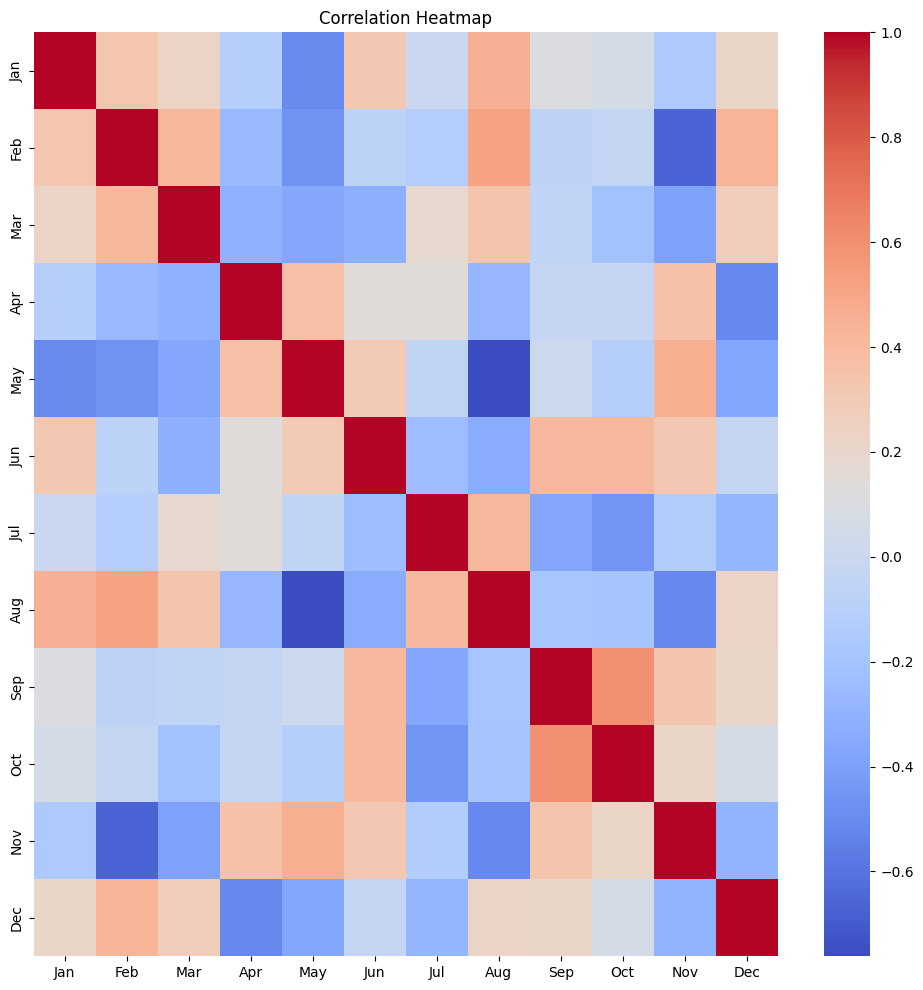

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".5f", xticklabels=new_df.columns, yticklabels=new_df.columns)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
plt.savefig('maonths.png')

<Figure size 640x480 with 0 Axes>